In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from glob import glob
from datetime import datetime

In [4]:
filepath = '../../datalake/silver/ember_electricity_monthly.csv'

In [5]:
dados = pd.read_csv(filepath)

In [6]:
dados.describe()

,EU,OECD,G20,G7,Value,YoY absolute change,YoY % change
count,15339.000000,15339.000000,15339.000000,15339.0,15339.000000,8802.000000,8113.000000
mean,0.312537,0.707738,0.321338,0.0,15.479354,-0.178074,9.752503
std,0.463542,0.454817,0.467005,0.0,48.682286,9.557891,123.887116
min,0.000000,0.000000,0.000000,0.0,-1.180000,-127.610000,-5100.000000
25%,0.000000,0.000000,0.000000,0.0,0.130000,-0.060000,-9.160000
50%,0.000000,1.000000,0.000000,0.0,2.180000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.0,10.395000,0.120000,17.390000
max,1.000000,1.000000,1.000000,0.0,514.420000,237.710000,3900.000000


# Análise da demanda de eletricidade

In [7]:
dados.columns

Index(['Area', 'Country code', 'Date', 'Area type', 'Continent',
       'Ember region', 'EU', 'OECD', 'G20', 'G7', 'Category', 'Subcategory',
       'Variable', 'Unit', 'Value', 'YoY absolute change', 'YoY % change'],
      dtype='object')

In [8]:
dados.Category.unique()

array(['Electricity demand', 'Electricity generation',
       'Electricity imports', 'Power sector emissions',
       'Electricity prices'], dtype=object)

Periodo de dadod de covid

In [9]:
datas = [datetime(2019, 1, 1), datetime(2022, 7, 31)]
dados.Date = pd.to_datetime(dados.Date)
dados2 = dados[(dados.Date.between(datas[0], datas[1]))]


In [10]:
# demanda.Subcategory.unique()

NameError: name 'demanda' is not defined

In [13]:
demanda = dados2[dados2.Category == 'Electricity prices']#[['Area', 'Date', 'Value']] # Unit = TWh
demanda.set_index('Date', inplace=True)
demanda

,Area,Country code,Area type,Continent,Ember region,EU,OECD,G20,G7,Category,Subcategory,Variable,Unit,Value,YoY absolute change,YoY % change
Date,,,,,,,,,,,,,,,,
2019-01-01,Spain,ESP,Country,Europe,Europe,1.0,1.0,0.0,0.0,Electricity prices,Day-ahead electricity price,Day-ahead electricity price,EUR/MWh,61.96,11.91,23.80
2019-02-01,Spain,ESP,Country,Europe,Europe,1.0,1.0,0.0,0.0,Electricity prices,Day-ahead electricity price,Day-ahead electricity price,EUR/MWh,54.02,-0.85,-1.55
2019-03-01,Spain,ESP,Country,Europe,Europe,1.0,1.0,0.0,0.0,Electricity prices,Day-ahead electricity price,Day-ahead electricity price,EUR/MWh,48.84,8.68,21.61
2019-04-01,Spain,ESP,Country,Europe,Europe,1.0,1.0,0.0,0.0,Electricity prices,Day-ahead electricity price,Day-ahead electricity price,EUR/MWh,50.40,7.71,18.06
2019-05-01,Spain,ESP,Country,Europe,Europe,1.0,1.0,0.0,0.0,Electricity prices,Day-ahead electricity price,Day-ahead electricity price,EUR/MWh,48.39,-6.59,-11.99
2019-06-01,Spain,ESP,Country,Europe,Europe,1.0,1.0,0.0,0.0,Electricity prices,Day-ahead electricity price,Day-ahead electricity price,EUR/MWh,47.16,-11.29,-19.32
2019-07-01,Spain,ESP,Country,Europe,Europe,1.0,1.0,0.0,0.0,Electricity prices,Day-ahead electricity price,Day-ahead electricity price,EUR/MWh,51.46,-10.42,-16.84
2019-08-01,Spain,ESP,Country,Europe,Europe,1.0,1.0,0.0,0.0,Electricity prices,Day-ahead electricity price,Day-ahead electricity price,EUR/MWh,44.95,-19.39,-30.14
2019-09-01,Spain,ESP,Country,Europe,Europe,1.0,1.0,0.0,0.0,Electricity prices,Day-ahead electricity price,Day-ahead electricity price,EUR/MWh,42.13,-29.12,-40.87


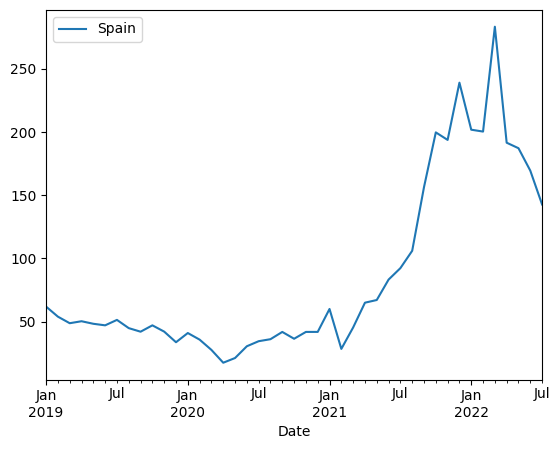

In [12]:
# fig, ax = plt.subplots(1) 
for area in demanda.Area.unique():
    dados_plot = demanda[demanda.Area==area]
    dados_plot.columns = ['Area', area]
    dados_plot.plot()

In [ ]:
dados.columns

Index(['Area', 'Country code', 'Date', 'Area type', 'Continent',
       'Ember region', 'EU', 'OECD', 'G20', 'G7', 'Category', 'Subcategory',
       'Variable', 'Unit', 'Value', 'YoY absolute change', 'YoY % change'],
      dtype='object')